In [1]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math
from sklearn import svm, datasets
import pylab as pl
from IPython.display import Image
from time import gmtime, strftime
import cv2

In [22]:
mask = scipy.io.loadmat('data/eigenfaces_data/mask.mat')['mask']
# np.nonzero(mask)

ValueError: too many values to unpack (expected 2)

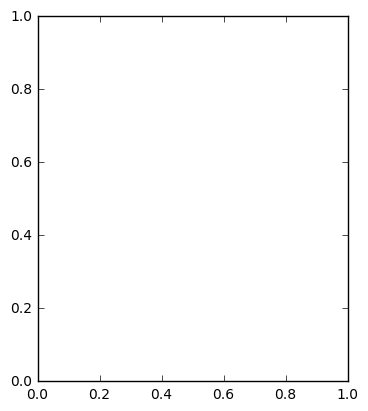

In [28]:
plt.matshow(mask)
PLT.SHOW()

In [15]:
img = cv2.imread('data/eigenfaces_data/CelebrityDatabase/Adam Baldwin.jpg')

In [16]:
img.shape

(330, 280, 3)

In [8]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    

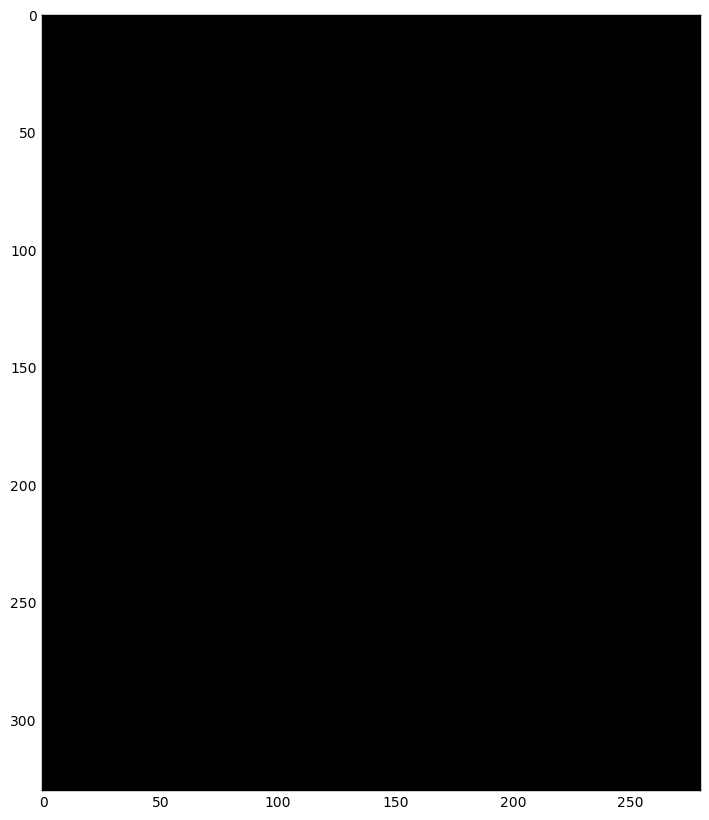

In [18]:
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
show_mask(mask)
